In [1]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import lag_plot


In [2]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [3]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

acciona = df[df['empresa'] == 'Acciona']

acciona.shape

(1316, 10)

In [4]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

acciona = acciona [['date','open','high','low','close','adj close']]

acciona.shape

(1316, 6)

In [5]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

acciona['date'] = pd.to_datetime(acciona['date'], format="%Y-%m-%d")

acciona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1316 entries, 0 to 1315
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1316 non-null   datetime64[ns]
 1   open       1316 non-null   float64       
 2   high       1316 non-null   float64       
 3   low        1316 non-null   float64       
 4   close      1316 non-null   float64       
 5   adj close  1316 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.0 KB


In [6]:
# Paso 5: Ordenar el DF por fecha

acciona.sort_values(by='date',ascending= True, inplace=True)

acciona.head()

,date,open,high,low,close,adj close
0,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270
541,2019-01-03,74.199997,74.199997,74.199997,74.199997,64.408676
879,2019-01-04,76.580002,76.580002,76.580002,76.580002,66.474617
878,2019-01-07,76.980003,77.139999,75.860001,77.139999,66.960716
877,2019-01-08,77.139999,78.400002,77.139999,78.239998,67.915558


In [7]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

acciona = acciona[(acciona['date'] >= fecha_inicio) & (acciona['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

acciona.shape

(811, 6)

In [8]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=acciona['date'].min(), end=acciona['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

acciona = acciona.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

acciona = acciona.rename(columns={'index': 'date'})


In [9]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

acciona.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,117.199997,118.099998,116.699997,116.699997,107.314598
1,2021-01-05,117.599998,117.900002,116.099998,116.599998,107.222633
2,2021-01-06,117.099998,119.400002,116.500000,119.400002,109.797455
3,2021-01-07,119.699997,126.199997,119.699997,125.900002,115.774712
4,2021-01-08,127.000000,128.600006,127.000000,127.800003,117.521904
5,2021-01-09,NaN,NaN,NaN,NaN,NaN
6,2021-01-10,NaN,NaN,NaN,NaN,NaN
7,2021-01-11,126.699997,126.699997,124.699997,124.699997,114.671211
8,2021-01-12,124.699997,127.000000,124.699997,124.800003,114.763176
9,2021-01-13,122.500000,126.599998,122.500000,126.599998,116.418411


In [10]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

acciona = acciona.fillna(method='ffill')

In [11]:
# Paso 10: Comprobar que se han introducido los valores correctamente


acciona.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,117.199997,118.099998,116.699997,116.699997,107.314598
1,2021-01-05,117.599998,117.900002,116.099998,116.599998,107.222633
2,2021-01-06,117.099998,119.400002,116.500000,119.400002,109.797455
3,2021-01-07,119.699997,126.199997,119.699997,125.900002,115.774712
4,2021-01-08,127.000000,128.600006,127.000000,127.800003,117.521904
5,2021-01-09,127.000000,128.600006,127.000000,127.800003,117.521904
6,2021-01-10,127.000000,128.600006,127.000000,127.800003,117.521904
7,2021-01-11,126.699997,126.699997,124.699997,124.699997,114.671211
8,2021-01-12,124.699997,127.000000,124.699997,124.800003,114.763176
9,2021-01-13,122.500000,126.599998,122.500000,126.599998,116.418411


In [12]:
# Paso 11: Establecer columna 'date' como índice para modelo

acciona = acciona.set_index('date')

acciona.head(10)

,open,high,low,close,adj close
date,,,,,
2021-01-04,117.199997,118.099998,116.699997,116.699997,107.314598
2021-01-05,117.599998,117.900002,116.099998,116.599998,107.222633
2021-01-06,117.099998,119.400002,116.500000,119.400002,109.797455
2021-01-07,119.699997,126.199997,119.699997,125.900002,115.774712
2021-01-08,127.000000,128.600006,127.000000,127.800003,117.521904
2021-01-09,127.000000,128.600006,127.000000,127.800003,117.521904
2021-01-10,127.000000,128.600006,127.000000,127.800003,117.521904
2021-01-11,126.699997,126.699997,124.699997,124.699997,114.671211
2021-01-12,124.699997,127.000000,124.699997,124.800003,114.763176


In [13]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

acciona.index = pd.DatetimeIndex(acciona.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

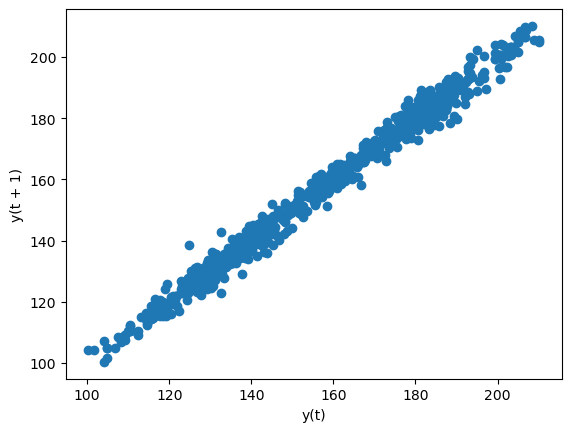

In [14]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

lag_plot(acciona.close)

In [15]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [16]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = acciona.close[:-10], acciona.close[-10:]

train.shape, test.shape

((1143,), (10,))

In [17]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [18]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(acciona.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    108.731984
2024-02-22    108.913225
2024-02-23    109.093729
2024-02-24    109.273499
2024-02-25    109.452538
2024-02-26    109.630848
2024-02-27    109.808434
2024-02-28    109.985297
2024-02-29    110.161442
2024-03-01    110.336870
Freq: D, dtype: float64

In [19]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    108.300003
2024-02-22    106.699997
2024-02-23    104.750000
2024-02-24    104.750000
2024-02-25    104.750000
2024-02-26    101.550003
2024-02-27    104.199997
2024-02-28    100.300003
2024-02-29    104.050003
2024-03-01    107.000000
Freq: D, Name: close, dtype: float64

In [20]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

4.9037859824258705

In [21]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,108.300003,108.731984,0.431981
2024-02-22,106.699997,108.913225,2.213228
2024-02-23,104.750000,109.093729,4.343729
2024-02-24,104.750000,109.273499,4.523499
2024-02-25,104.750000,109.452538,4.702538
2024-02-26,101.550003,109.630848,8.080845
2024-02-27,104.199997,109.808434,5.608437
2024-02-28,100.300003,109.985297,9.685294
2024-02-29,104.050003,110.161442,6.111439
2024-03-01,107.000000,110.336870,3.336870
